# Decision Tree 

In [1]:
from sklearn import datasets
import pandas as pd

**Load Iris Dataset** 
 
 Iris is a genus of 260–300 species of flowering plants
with showy flowers. However, in our dataset, just three species are covered—Setosa,
Versicolor, and Virginica

In [2]:
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(
 iris.data,
 columns=iris.feature_names
)
df['target'] = pd.Series(
 iris.target
)
df['target_names'] = df['target'].apply(lambda y:
iris.target_names[y])

In [5]:
df.sample(n=6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
70,5.9,3.2,4.8,1.8,1,versicolor
3,4.6,3.1,1.5,0.2,0,setosa
12,4.8,3.0,1.4,0.1,0,setosa
65,6.7,3.1,4.4,1.4,1,versicolor
129,7.2,3.0,5.8,1.6,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica


In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3)

In [7]:
x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]
y_train = df_train['target']
y_test = df_test['target']

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

In [10]:
y_test_pred = clf.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9555555555555556

In [12]:
from sklearn.tree import export_text
print(
 export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1)
)

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal length (cm) <= 4.8
|   |   |--- class: 1
|   |--- petal length (cm) >  4.8
|   |   |--- petal width (cm) <= 1.8
|   |   |   |--- petal length (cm) <= 5.0
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  5.0
|   |   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |   |--- petal length (cm) <= 5.5
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.5
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.8
|   |   |   |--- class: 2



### repeated random sub-sampling validation, or Monte Carlo cross-validation.
*let's run the whole process of data splitting, training, and predicting, **more than once**, and get the distribution of the different accuracy scores we get each time.* 

In [13]:
#A list to store the score from each iteration
accuracy_scores = []


for _ in range(100):
    # At each iteration we freshly split our data
    df_train, df_test = train_test_split(df, test_size=0.3)
    x_train = df_train[iris.feature_names]
    x_test = df_test[iris.feature_names]
    y_train = df_train['target']
    y_test = df_test['target']
    # We then create a new classifier
    clf = DecisionTreeClassifier()
    # And use it for training and prediction
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    # Finally, we append the score to our list
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))
# Better convert accuracy_scores from a list into a series
# Pandas series provides statistical methods to use later
accuracy_scores = pd.Series(accuracy_scores)


Average Score: 0.945 [5th percentile: 0.889 & 95th percentile:0.978]


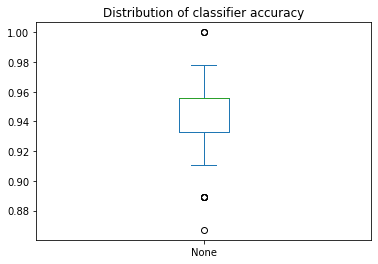

In [16]:
accuracy_scores.plot(
 title='Distribution of classifier accuracy',
 kind='box',
)
print(
 'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
 accuracy_scores.mean(),
 accuracy_scores.quantile(.05),
 accuracy_scores.quantile(.95),
 )
)


### scikit-learn's ShuffleSplit module

In [18]:
from sklearn.model_selection import ShuffleSplit

accuracy_scores = []

# Create a shuffle split instance
rs = ShuffleSplit(n_splits=100, test_size=0.3)
# We now get 100 pairs of indices
for train_index, test_index in rs.split(df):
    x_train = df.loc[train_index, iris.feature_names]
    x_test = df.loc[test_index, iris.feature_names]
    y_train = df.loc[train_index, 'target']
    y_test = df.loc[test_index, 'target']
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))
    
accuracy_scores = pd.Series(accuracy_scores)


Average Score: 0.944 [5th percentile: 0.889 & 95th percentile:1.0]


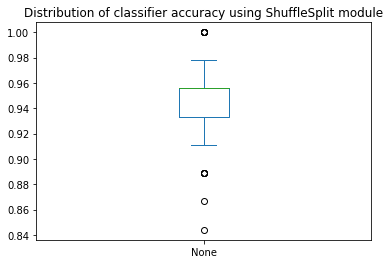

In [19]:
accuracy_scores.plot(
 title='Distribution of classifier accuracy using ShuffleSplit module',
 kind='box',
)
print(
 'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
 accuracy_scores.mean(),
 accuracy_scores.quantile(.05),
 accuracy_scores.quantile(.95),
 )
)

### scikit-learn's Cross_validate functionality

In [20]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)

x = df[iris.feature_names]
y = df['target']
cv_results = cross_validate(
 clf, x, y, cv=rs, scoring='accuracy'
)
accuracy_scores = pd.Series(cv_results['test_score'])


Average Score: 0.948 [5th percentile: 0.911 & 95th percentile:0.978]


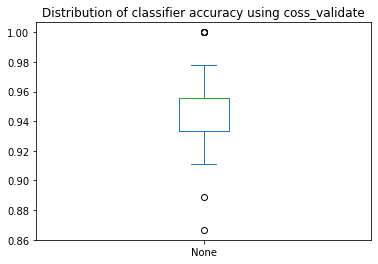

In [21]:
accuracy_scores.plot(
 title='Distribution of classifier accuracy using coss_validate',
 kind='box',
)
print(
 'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile:{:.3}]'.format(
 accuracy_scores.mean(),
 accuracy_scores.quantile(.05),
 accuracy_scores.quantile(.95),
 )
)

### Trying different hyperparameter values

In [22]:

for max_depth in [1, 2, 3, 4]:
    # We initialize a new classifier each iteration with different max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth)
    # We also initialize our shuffle splitter
    rs = ShuffleSplit(n_splits=20, test_size=0.25)
    cv_results = cross_validate(
    clf, x_train, y_train, cv=rs, scoring='accuracy'
    )
    accuracy_scores = pd.Series(cv_results['test_score'])
    print(
    '@ max_depth = {}: accuracy_scores: {}~{}'.format(
    max_depth,
    accuracy_scores.quantile(.1).round(3),
    accuracy_scores.quantile(.9).round(3)))


@ max_depth = 1: accuracy_scores: 0.515~0.667
@ max_depth = 2: accuracy_scores: 0.889~1.0
@ max_depth = 3: accuracy_scores: 0.926~1.0
@ max_depth = 4: accuracy_scores: 0.926~1.0


###  train a model once more using the entire training set and a max_depth value 3

In [24]:
clf = DecisionTreeClassifier(max_depth=3)

x_train = df[iris.feature_names]
y_train = df['target']

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Feature engineering

In [36]:
iris = datasets.load_iris()
df = pd.DataFrame(
 iris.data,
 columns=iris.feature_names
)
df['target'] = pd.Series(
 iris.target
)
df['target_names'] = df['target'].apply(lambda y:
iris.target_names[y])

In [37]:
##create two new columns—petal length x width (cm) and sepal length x width (cm)

df['petal length x width (cm)'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']

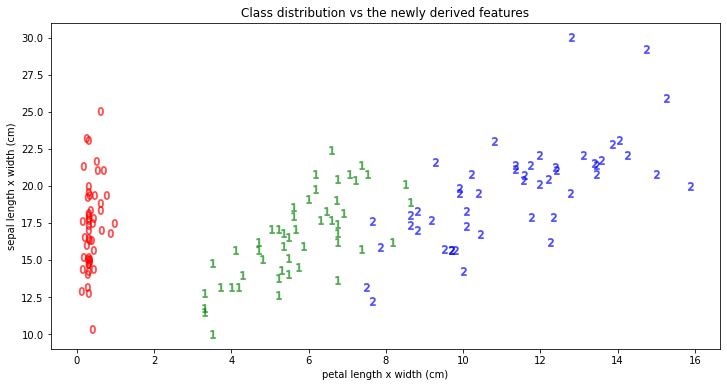

In [38]:
import matplotlib.pyplot as plt
# plot the classes versus the newly derived features
fig, ax = plt.subplots(1, 1, figsize=(12, 6));
h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'
for c in df['target'].value_counts().index.tolist():
    df[df['target'] == c].plot(
    title='Class distribution vs the newly derived features',
    kind='scatter',
    x=h_label,
    y=v_label,
    color=['r', 'g', 'b'][c], # Each class different color
    marker=f'${c}$', # Use class id as marker
    s=64,
    alpha=0.5,
    ax=ax,
    )


In [45]:
features_orig = iris.feature_names
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']
accuracy_scores_orig = []
accuracy_scores_new = []

for _ in range(500):
    df_train, df_test = train_test_split(df, test_size=0.3)
    x_train_orig = df_train[features_orig]
    x_test_orig = df_test[features_orig]
    x_train_new = df_train[features_new]
    x_test_new = df_test[features_new]
    y_train = df_train['target']
    y_test = df_test['target']
    clf_orig = DecisionTreeClassifier(max_depth=2)
    clf_new = DecisionTreeClassifier(max_depth=2)
    clf_orig.fit(x_train_orig, y_train)
    clf_new.fit(x_train_new, y_train)
    y_pred_orig = clf_orig.predict(x_test_orig)
    y_pred_new = clf_new.predict(x_test_new)
    accuracy_scores_orig.append(round(accuracy_score(y_test, y_pred_orig), 3))
    accuracy_scores_new.append(round(accuracy_score(y_test, y_pred_new), 3))
    
accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)


<AxesSubplot:title={'center':'Distribution of classifier accuracy [New Features]'}>

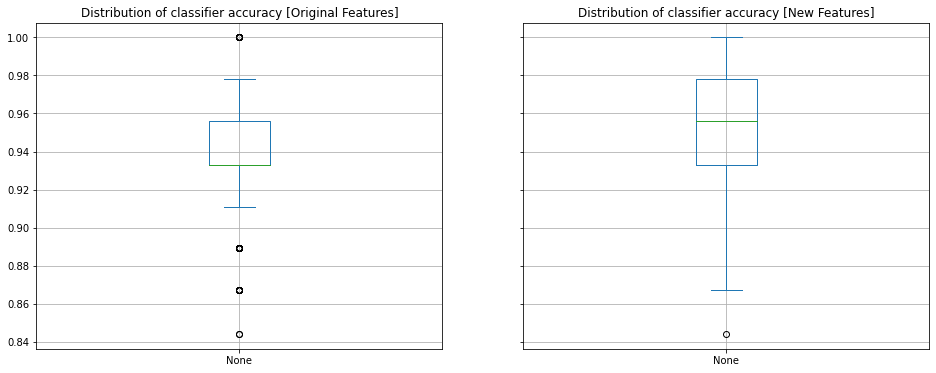

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True);
accuracy_scores_orig.plot(
 title='Distribution of classifier accuracy [Original Features]',
 kind='box',
 grid=True,
 ax=axs[0]
)
accuracy_scores_new.plot(
 title='Distribution of classifier accuracy [New Features]',
 kind='box',
 grid=True,
 ax=axs[1]
)


## Building decision tree regressors

#### Predicting people's heights
Population 1 has an average height of 155 cm for females,
with a standard deviation of 4, and an average height of 175 cm for males, with a standard
deviation of 5. Population 2 has an average height of 165 cm for females, with a standard
deviation of 15, and an average height of 185 cm for males, with a standard deviation of 12.
We decide to take 200 males and 200 females from each population.

In [47]:
import numpy as np
# We need 200 samples from each
n = 200
# From each population we get 200 male and 200 female samples
height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

# We group all females together and all males together
height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

df_height = pd.DataFrame(
 {
 'Gender': [1 for i in range(height_f.size)] +
 [2 for i in range(height_m.size)],
 'Height': np.concatenate((height_f, height_m))
 }
)


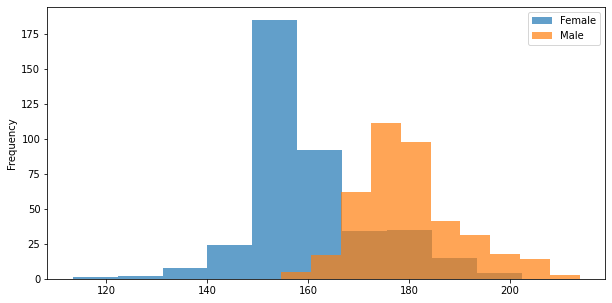

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df_height[df_height['Gender'] == 1]['Height'].plot(
 label='Female', kind='hist',
 bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender'] == 2]['Height'].plot(
 label='Male', kind='hist',
 bins=10, alpha=0.7, ax=ax
)
ax.legend()

In [49]:
df_train, df_test = train_test_split(df_height, test_size=0.3)
x_train, x_test = df_train[['Gender']], df_test[['Gender']]
y_train, y_test = df_train['Height'], df_test['Height']

In [52]:
from sklearn.tree import DecisionTreeRegressor

for criterion in ['squared_error', 'absolute_error']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(x_train, y_train)
    print(f'criterion={criterion}:\n')
    print(export_text(rgrsr, feature_names=['Gender'], spacing=3,
    decimals=1))

criterion=squared_error:

|--- Gender <= 1.5
|   |--- value: [159.7]
|--- Gender >  1.5
|   |--- value: [180.2]

criterion=absolute_error:

|--- Gender <= 1.5
|   |--- value: [156.6]
|--- Gender >  1.5
|   |--- value: [178.7]



**When MSE was used, the predictions were close to the mean of each gender, while for MAE, the predictions were close to the median.**

Actually, in this case, we do not even need to
train a decision tree; we could have easily calculated the mean heights for males and
females and used them as our expected values right away. The decisions made by such a
shallow tree are called biased decisions. If we would have allowed each individual to
express themselves using more information, rather than just their gender, then we would
have been able to make more accurate predictions for each individual. 

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_pred = rgrsr.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('MAE:', mean_absolute_error(y_test, y_test_pred))

MSE: 128.59444323892362
MAE: 7.982210020380829


#### Setting sample weights

In [58]:
rgrsr = DecisionTreeRegressor(criterion='squared_error')

print('emphasis on "below 150":')
sample_weight = y_train.apply(lambda h: 10 if h <= 150 else 1)
rgrsr.fit(x_train, y_train, sample_weight=sample_weight)
print(
 export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1)
)
print('emphasis on "above 150":')
sample_weight = y_train.apply(lambda h: 10 if h > 150 else 1)
rgrsr.fit(x_train, y_train, sample_weight=sample_weight)
print(
 export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1)
)

emphasis on "below 150":
|--- Gender <= 1.5
|   |--- value: [150.8]
|--- Gender >  1.5
|   |--- value: [180.2]

emphasis on "above 150":
|--- Gender <= 1.5
|   |--- value: [161.8]
|--- Gender >  1.5
|   |--- value: [180.2]

